In [2]:
from dasly.master import Dasly
import numpy as np
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# from datetime import datetime
from zoneinfo import ZoneInfo
import os
import pickle

from dasly import utils
from typing import List, Dict, Any, Tuple, Union

In [3]:
# Define the path to the YAML file
yaml_path = '../config_aastfjordbrua.yml'

# Open and read the YAML file
with open(yaml_path, 'r') as file:
    params = yaml.safe_load(file)


# Access parameters from the YAML file
input_dir = params['input_dir']
start_exact_second = params['start_exact_second']
integrate = params['integrate']

database_type = params['database']['type']
dbapi = params['database']['dbapi']
endpoint = params['database']['endpoint']
port = params['database']['port']
database = params['database']['database']
database_table = params['database']['table']

hdf5_file_length = params['hdf5_file_length']
batch = params['dasly']['batch']
batch_gap = params['dasly']['batch_gap']

lowpass_filter_freq = params['lowpass_filter_freq']
decimate_t_rate = params['decimate_t_rate']

gaussian_smooth_s1 = params['gaussian_smooth']['s1']
gaussian_smooth_s2 = params['gaussian_smooth']['s2']
gaussian_smooth_std_s = params['gaussian_smooth']['std_s']

binary_threshold = params['binary_threshold']

hough_speed_res = params['hough_transform']['speed_res']
hough_length_meters = params['hough_transform']['length_meters']

dbscan_eps_seconds = params['dbscan_eps_seconds']

In [4]:
log = pd.read_excel('../data/logs/vehicle-log-clean.xlsx')
# log
start = log.loc[0, 't1'] - pd.Timedelta(seconds=15)
start = start.strftime('%Y%m%d %H%M%S')
start

'20231005 080610'

In [5]:
chIndex_all = np.arange(0, 800)
chIndex_remove1 = np.arange(0, 36)
chIndex_remove2 = np.arange(365, 387)
chIndex_remove3 = np.arange(751, 800)
chIndex_remove = np.concatenate((
    chIndex_remove1, chIndex_remove2, chIndex_remove3))
chIndex = np.setdiff1d(chIndex_all, chIndex_remove)
das = Dasly()
das.load_data(
    folder_path='/media/kptruong/yellow02/Aastfjordbrua/Aastfjordbrua',
    start=start,
    # start='20231005 082400',  # One car
    # start='20231005 094345',
    # start='20231005 082445',
    # start='20231005 082445',
    # start='20230901 103015',  # full 2 lines
    # start='20230901 163110',  # part of lines
    # start='20230901 183015',  # noise
    # start='20230901 104015',  # 2 lines close to each other
    # start='20231005 104715',  # 2 truck + 2 cars
    # start='20231005 082155',  # 1 truck
    # start='20231005 082130',  # 4 cars
    # start='20231005 090535',  # 2 trucks + 4 cars following each other
    duration=60,
    integrate=False,
    chIndex=chIndex,
    reset_channel_idx=True,
)

7 files, from 080604 to 080704


In [6]:
t1 = log.loc[0, 't1']
t2 = log.loc[0, 't2']
s1 = log.loc[0, 's1']
s2 = log.loc[0, 's2']
window = 3

data = utils.extract_section_spacetime(
    s1=s1,
    t1=t1,
    s2=s2,
    t2=t2,
    t_rate=1000,
    s_rate=1,
    window=window,
    data=das.signal,
)

In [7]:
data

array([[-2.4866799e-06,  5.7755146e-06,  6.7180463e-06, ...,
        -2.9679727e-06,  7.2193933e-07,  1.4438787e-06],
       [ 2.2660872e-06, -2.3723727e-05,  1.8369345e-05, ...,
        -1.6243634e-06,  2.2059257e-07,  4.4920666e-06],
       [-2.2460333e-06, -1.3716847e-05,  3.1284037e-06, ...,
        -3.5695889e-06, -1.4037708e-07,  2.0053869e-07],
       ...,
       [ 4.0508817e-06, -7.6004167e-06,  1.1390598e-05, ...,
         6.6177768e-07,  4.2714742e-06,  1.5040403e-06],
       [ 3.3489962e-06, -5.9961071e-06,  6.5776694e-06, ...,
         4.1110434e-06,  2.7273263e-06,  1.4639324e-06],
       [-1.6043095e-06, -1.2413346e-05,  1.4238248e-06, ...,
         4.0709356e-06,  5.9961071e-06,  1.6845250e-06]], dtype=float32)

In [8]:
# quantiles = np.arange(0.1, 1.0, 0.1)
# min_values = np.min(data, axis=0)               # Minimum of each column
# quantile_values = np.quantile(data, quantiles, axis=0)  # Quantiles of each column
# max_values = np.max(data, axis=0)
# result = np.vstack([min_values, quantile_values, max_values])


quantiles = np.arange(0.1, 1.0, 0.1)
min_value = np.min(data.flatten())               # Minimum of each column
quantile_values = np.quantile(data.flatten(), quantiles)  # Quantiles of each column
max_value = np.max(data.flatten())
result = np.concatenate([[min_value], quantile_values, [max_value]])

In [9]:
# strain_rate_list = []
# frequencies_list = []
# agg_spectrum_list = []


# for i in range(len(log)):
#     start = log.loc[i, 't1'] - pd.Timedelta(seconds=15)
#     start = start.strftime('%Y%m%d %H%M%S')
    
#     chIndex_all = np.arange(0, 800)
#     chIndex_remove1 = np.arange(0, 36)
#     chIndex_remove2 = np.arange(365, 387)
#     chIndex_remove3 = np.arange(751, 800)
#     chIndex_remove = np.concatenate((
#         chIndex_remove1, chIndex_remove2, chIndex_remove3))
#     chIndex = np.setdiff1d(chIndex_all, chIndex_remove)
#     das = Dasly()
#     das.load_data(
#         folder_path='/media/kptruong/yellow02/Aastfjordbrua/Aastfjordbrua',
#         start=start,
#         duration=60,
#         integrate=False,
#         chIndex=chIndex,
#         reset_channel_idx=True,
#     )

#     t1 = log.loc[i, 't1']
#     t2 = log.loc[i, 't2']
#     s1 = log.loc[i, 's1']
#     s2 = log.loc[i, 's2']
#     window = 3

#     data = utils.extract_section_spacetime(
#         s1=s1,
#         t1=t1,
#         s2=s2,
#         t2=t2,
#         t_rate=1000,
#         s_rate=1,
#         window=window,
#         data=das.signal,
#     )

#     quantiles = np.arange(0.1, 1.0, 0.1)
#     min_value = np.min(np.abs(data).flatten())               # Minimum of each column
#     quantile_values = np.quantile(np.abs(data).flatten(), quantiles)  # Quantiles of each column
#     max_value = np.max(np.abs(data).flatten())
#     result = np.concatenate([[min_value], quantile_values, [max_value]])
#     strain_rate_list.append(result.tolist())

#     frequencies, agg_spectrum = das.fft(data=data, plot=False)
#     frequencies_list.append(frequencies.tolist())
#     agg_spectrum_list.append(agg_spectrum.tolist())

In [10]:
# with open("../data/aastfjordbrua_processed/strain_rate_list.pkl", "wb") as file:
#     pickle.dump(strain_rate_list, file)

# with open("../data/aastfjordbrua_processed/frequencies_list.pkl", "wb") as file:
#     pickle.dump(frequencies_list, file)

# with open("../data/aastfjordbrua_processed/agg_spectrum_list.pkl", "wb") as file:
#     pickle.dump(agg_spectrum_list, file)

In [11]:
with open("../data/aastfjordbrua_processed/strain_rate_list.pkl", "rb") as file:
    strain_rate_list = pickle.load(file)

with open("../data/aastfjordbrua_processed/frequencies_list.pkl", "rb") as file:
    frequencies_list = pickle.load(file)

with open("../data/aastfjordbrua_processed/agg_spectrum_list.pkl", "rb") as file:
    agg_spectrum_list = pickle.load(file)

In [12]:
new_column_names = ['min', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'max']

# Convert the array to a DataFrame and assign column names
new_data_df = pd.DataFrame(strain_rate_list, columns=new_column_names)

# Concatenate the existing DataFrame with the new one
combined_df = pd.concat([log, new_data_df], axis=1)
combined_df

,Type,Type2,Direction camera,t1,t2,s1,s2,min,q1,q2,q3,q4,q5,q6,q7,q8,q9,max
0,Car,Small,coming close,2023-10-05 08:06:25.000,2023-10-05 08:06:55.000,0,692,0.0,3.409158e-07,7.018854e-07,0.000001,0.000001,0.000002,0.000002,0.000003,0.000004,0.000005,0.000041
1,Truck,Large,going far,2023-10-05 08:07:39.000,2023-10-05 08:08:09.000,692,0,0.0,9.425319e-07,1.945225e-06,0.000003,0.000004,0.000006,0.000008,0.000010,0.000013,0.000019,0.000299
2,Car,Small,coming close,2023-10-05 08:07:32.000,2023-10-05 08:08:02.000,0,692,0.0,4.812929e-07,9.826396e-07,0.000002,0.000002,0.000003,0.000004,0.000005,0.000006,0.000010,0.000181
3,Car,Small,going far,2023-10-05 08:08:12.000,2023-10-05 08:08:42.000,692,0,0.0,4.211313e-07,8.623164e-07,0.000001,0.000002,0.000002,0.000003,0.000004,0.000005,0.000007,0.000060
4,Car,Small,coming close,2023-10-05 08:12:54.000,2023-10-05 08:13:24.000,0,692,0.0,4.010774e-07,8.021548e-07,0.000001,0.000002,0.000002,0.000003,0.000003,0.000004,0.000006,0.000265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,Car,Small,going far,2023-10-05 11:03:56.070,2023-10-05 11:04:26.070,692,0,0.0,3.409158e-07,7.018854e-07,0.000001,0.000001,0.000002,0.000002,0.000003,0.000004,0.000005,0.000029
338,Car,Small,coming close,2023-10-05 11:03:52.070,2023-10-05 11:04:22.070,0,692,0.0,3.810235e-07,7.821009e-07,0.000001,0.000002,0.000002,0.000003,0.000003,0.000004,0.000006,0.000048
339,Car,Small,coming close,2023-10-05 11:04:23.260,2023-10-05 11:04:53.260,0,692,0.0,4.010774e-07,8.222087e-07,0.000001,0.000002,0.000002,0.000003,0.000004,0.000005,0.000006,0.000080
340,Car,Small,coming close,2023-10-05 11:04:50.580,2023-10-05 11:05:20.580,0,692,0.0,4.211313e-07,8.623164e-07,0.000001,0.000002,0.000002,0.000003,0.000004,0.000005,0.000007,0.000068


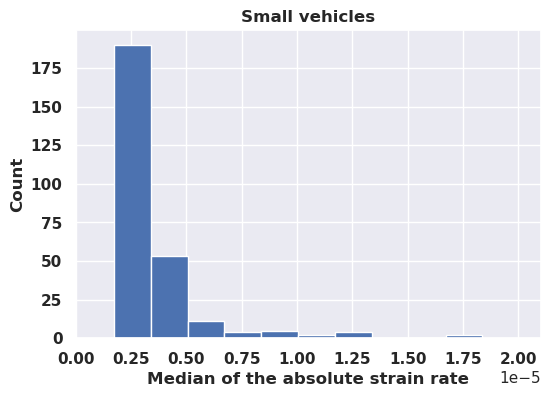

In [13]:
plt.figure(figsize=(6, 4))
(
    combined_df
    .loc[lambda df: df['Type2']=='Small']
    .q5
    .hist(density=False, bins=10)
)
plt.xlim(0, 2.1*10**-5)
plt.xlabel('Median of the absolute strain rate', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
# Make the tick labels along the x and y axes bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('Small vehicles', fontweight='bold');

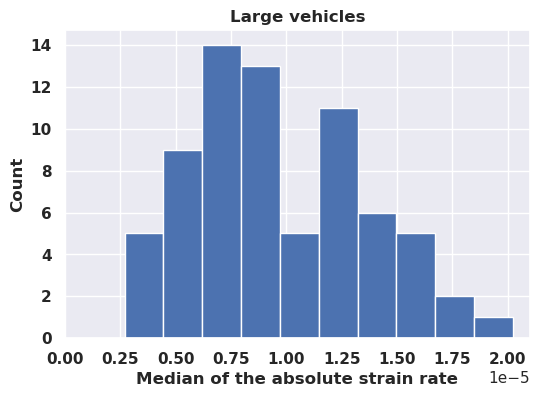

In [14]:
plt.figure(figsize=(6, 4))
(
    combined_df
    .loc[lambda df: df['Type2']=='Large']
    .q5
    .hist(density=False, bins=10)
)
plt.xlim(0, 2.1*10**-5)
plt.xlabel('Median of the absolute strain rate', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
# Make the tick labels along the x and y axes bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('Large vehicles', fontweight='bold');

In [15]:
small_idx = (
    log
    .loc[lambda df: df['Type2']=='Small']
    .index
    .to_list()
)

large_idx = (
    log
    .loc[lambda df: df['Type2']=='Large']
    .index
    .to_list()
)

In [16]:
small_spectrum = np.median(np.array(agg_spectrum_list)[small_idx, :], axis=0)
large_spectrum = np.median(np.array(agg_spectrum_list)[large_idx, :], axis=0)

In [17]:
large_spectrum

array([0.00091845, 0.00090615, 0.0009494 , ..., 0.00026015, 0.00026101,
       0.00025758])

In [18]:
das.load_data(
    folder_path='/media/kptruong/yellow02/Aastfjordbrua/Aastfjordbrua/',
    # start='20231005 082400',  # One car
    start='20231005 085100',  # Noise
    duration=60,
    integrate=False,
    chIndex=chIndex,
    reset_channel_idx=True,
)

7 files, from 085054 to 085154


In [19]:
line = np.array([   19, 10000,   691, 38000])
noise_frequencies, noise_spectrum = das.fft_windows(
    line=line,
    t=int(das.t_rate*1.5),
    # flim=(0, 30),
    # ylim=(0, 1.34*10**-3),
    plot=False
)

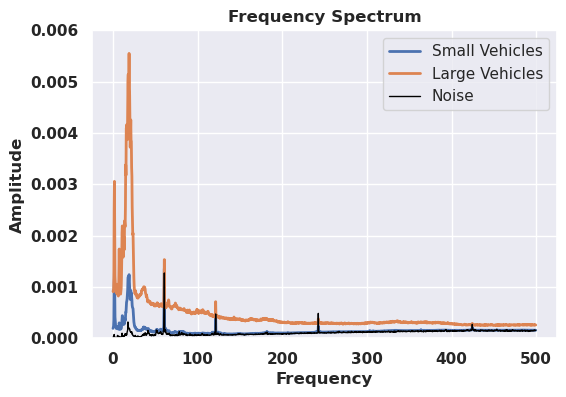

In [20]:
plt.figure(figsize=(6, 4))
plt.plot(frequencies_list[0], small_spectrum, label='Small Vehicles', alpha=1, linewidth=2)
plt.plot(frequencies_list[0], large_spectrum, label='Large Vehicles', alpha=1, linewidth=2)
plt.plot(frequencies_list[0], noise_spectrum, label='Noise', alpha=1, linewidth=1, color='black')
plt.ylim(0, 0.006)
plt.xlabel('Frequency', fontweight='bold')
plt.ylabel('Amplitude', fontweight='bold')
# Make the tick labels along the x and y axes bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('Frequency Spectrum', fontweight='bold')
plt.legend();

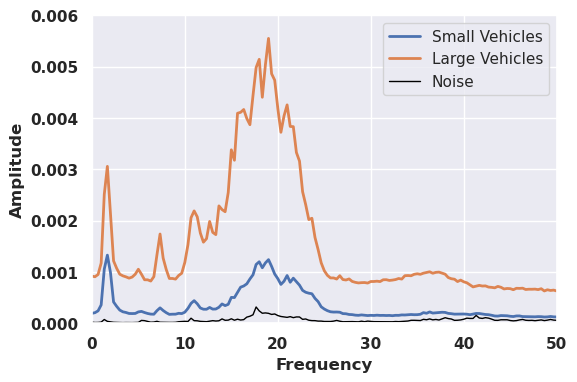

In [21]:
plt.figure(figsize=(6, 4))
plt.plot(frequencies_list[0], small_spectrum, label='Small Vehicles', alpha=1, linewidth=2)
plt.plot(frequencies_list[0], large_spectrum, label='Large Vehicles', alpha=1, linewidth=2)
plt.plot(frequencies_list[0], noise_spectrum, label='Noise', alpha=1, linewidth=1, color='black')
plt.ylim(0, 0.006)
plt.xlim(0, 50)
plt.xlabel('Frequency', fontweight='bold')
plt.ylabel('Amplitude', fontweight='bold')
# Make the tick labels along the x and y axes bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
# plt.title('Frequency Spectrum', fontweight='bold')
plt.legend();

In [22]:
connection_string = utils.create_connection_string(
    endpoint=params['database']['endpoint'],
    database=params['database']['database'],
    db_username=os.getenv('POSTGRESQL_USERNAME'),
    db_password=os.getenv('POSTGRESQL_PASSWORD'),
    type=params['database']['type'],
    dbapi=params['database']['dbapi'],
    port=params['database']['port']
)

query = """
WITH ranked_rows AS (
  SELECT *,
         ROW_NUMBER() OVER (PARTITION BY line_id ORDER BY created_at DESC) AS rn
  FROM vehicles
  WHERE (created_at BETWEEN '2024-09-09 22:00:00' AND '2024-09-10 22:00:00')
  AND ABS(SPEED_KMH) BETWEEN 35 AND 125
)
SELECT *
FROM ranked_rows
WHERE rn = 1;
"""
previous_lines_df = utils.read_sql(query, connection_string)
np.random.seed(42)
v_type = np.random.choice(['Large', 'Small'], size=len(previous_lines_df), p=[0.18, 0.82])
previous_lines_df = (
    previous_lines_df
    .assign(Type=v_type)
)

<Figure size 400x400 with 0 Axes>

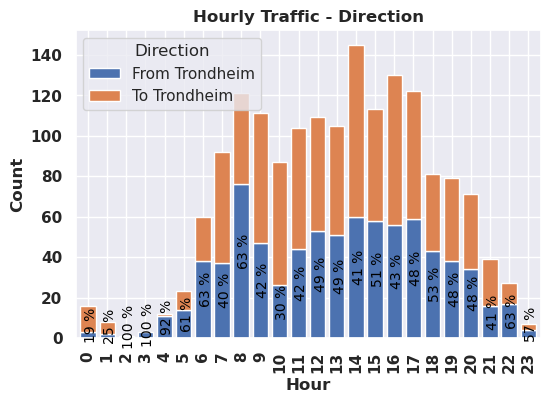

In [23]:
hourly_direction = (
    previous_lines_df
    .assign(created_at=lambda df: df['created_at'].dt.tz_convert('Europe/Berlin'))
    .assign(Hour=lambda df: df['created_at'].dt.hour)
    .assign(Direction=lambda df: np.where(df['speed_kmh'] > 0, 'To Trondheim', 'From Trondheim'))
    .groupby(['Hour', 'Direction'])
    .size()
    .unstack(level='Direction')
    .assign(Total=lambda df: df.sum(axis=1))
    .assign(FromTrondheimPercent=lambda df: df['From Trondheim'] / df['Total'] * 100)
)


plt.figure(figsize=(4, 4))

# Plot the stacked bar chart
ax = hourly_direction[['From Trondheim', 'To Trondheim']].plot(kind='bar', stacked=True, figsize=(6, 4), width=0.8)

# Annotate the percentage of "From Trondheim" near the bottom of each bar
for i in range(len(hourly_direction)):
    from_trondheim_value = hourly_direction['From Trondheim'].iloc[i]
    percent_from_trondheim = hourly_direction['FromTrondheimPercent'].iloc[i]
    
    # Annotate percentage for "From Trondheim"
    ax.text(i+0.15, from_trondheim_value / 2 + 5, f'{percent_from_trondheim:.0f} %', 
            ha='center', va='center', color='black', fontsize=10, rotation=90)

# Add labels and title
plt.xlabel('Hour', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Hourly Traffic - Direction', fontweight='bold')

# Make the tick labels along the x and y axes bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')


# # Show the plot
plt.show()

<Figure size 400x400 with 0 Axes>

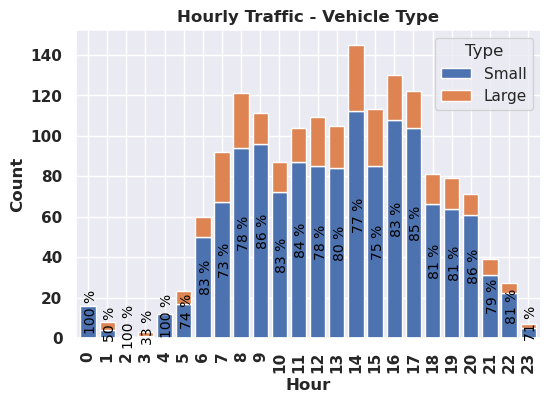

In [24]:
hourly_type = (
    previous_lines_df
    .assign(created_at=lambda df: df['created_at'].dt.tz_convert('Europe/Berlin'))
    .assign(Hour=lambda df: df['created_at'].dt.hour)
    # .assign(Direction=lambda df: np.where(df['speed_kmh'] > 0, 'To Trondheim', 'From Trondheim'))
    .groupby(['Hour', 'Type'])
    .size()
    .unstack(level='Type')
    .assign(Total=lambda df: df.sum(axis=1))
    .assign(SmallPercent=lambda df: df['Small'] / df['Total'] * 100)
)


plt.figure(figsize=(4, 4))

# Plot the stacked bar chart
ax = hourly_type[['Small', 'Large']].plot(kind='bar', stacked=True, figsize=(6, 4), width=0.8)

# Annotate the percentage of "From Trondheim" near the bottom of each bar
for i in range(len(hourly_type)):
    from_trondheim_value = hourly_type['Small'].iloc[i]
    percent_from_trondheim = hourly_type['SmallPercent'].iloc[i]
    
    # Annotate percentage for "From Trondheim"
    ax.text(i+0.15, from_trondheim_value / 2 + 5, f'{percent_from_trondheim:.0f} %', 
            ha='center', va='center', color='black', fontsize=10, rotation=90)

# Add labels and title
plt.xlabel('Hour', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Hourly Traffic - Vehicle Type', fontweight='bold')

# Make the tick labels along the x and y axes bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')


# # Show the plot
plt.show()

In [25]:
hourly_speed = (
    previous_lines_df
    .assign(created_at=lambda df: df['created_at'].dt.tz_convert('Europe/Berlin'))
    .assign(Hour=lambda df: df['created_at'].dt.hour)
    .assign(Direction=lambda df: np.where(df['speed_kmh'] > 0, 'To Trondheim', 'From Trondheim'))
    .assign(speed_kmh=lambda df: np.abs(df['speed_kmh']))
    .groupby(['Hour', 'Direction'])
    .agg({'speed_kmh': ['mean', 'std']})
    .fillna(0)
    # .size()
    # .unstack(level='Direction')
    # .assign(Total=lambda df: df.sum(axis=1))
    # .assign(FromTrondheimPercent=lambda df: df['From Trondheim'] / df['Total'] * 100)
)
# hourly_speed

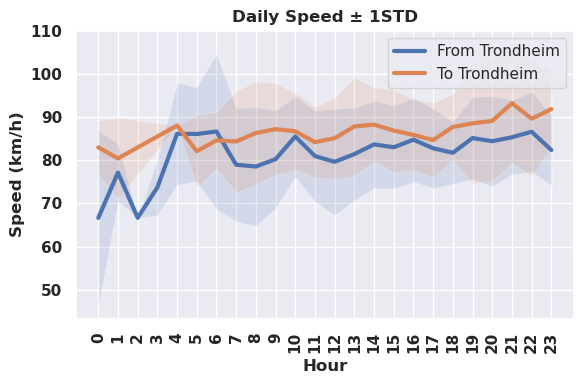

In [26]:
# Extract data for 'From Trondheim'
from_trondheim_mean = hourly_speed.loc[:, ('speed_kmh', 'mean')].xs('From Trondheim', level='Direction')
from_trondheim_std = hourly_speed.loc[:, ('speed_kmh', 'std')].xs('From Trondheim', level='Direction')

# Extract data for 'To Trondheim'
to_trondheim_mean = hourly_speed.loc[:, ('speed_kmh', 'mean')].xs('To Trondheim', level='Direction')
to_trondheim_std = hourly_speed.loc[:, ('speed_kmh', 'std')].xs('To Trondheim', level='Direction')

# Create the plot
plt.figure(figsize=(6, 4))

# Plot 'From Trondheim' with shaded area for std
plt.plot(from_trondheim_mean.index, from_trondheim_mean, label='From Trondheim', linewidth=3)  # Increased linewidth
plt.fill_between(from_trondheim_mean.index, 
                 from_trondheim_mean - from_trondheim_std, 
                 from_trondheim_mean + from_trondheim_std, 
                 alpha=0.15)

# Plot 'To Trondheim' with shaded area for std
plt.plot(to_trondheim_mean.index, to_trondheim_mean, label='To Trondheim', linewidth=3)  # Increased linewidth
plt.fill_between(to_trondheim_mean.index, 
                 to_trondheim_mean - to_trondheim_std, 
                 to_trondheim_mean + to_trondheim_std, 
                alpha=0.15)

# Add labels and legend
plt.xlabel('Hour', fontweight='bold')
plt.ylabel('Speed (km/h)', fontweight='bold')
plt.title('Daily Speed ± 1STD', fontweight='bold')

# Make the tick labels along the x and y axes bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Show all 24 hours on the x-axis
plt.xticks(ticks=range(24), rotation=90)  # Set xticks from 0 to 23 and rotate by 90 degrees

# Display legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Speed histogram and focus on the high speed

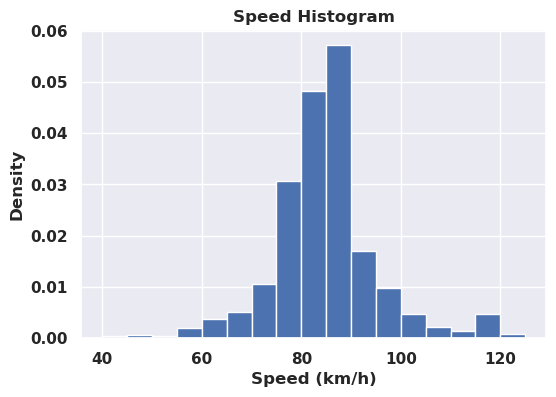

In [27]:
plt.figure(figsize=(6, 4))
(
    previous_lines_df
    .speed_kmh
    .abs()
    .hist(density=True, bins=range(40, 130, 5))
)
# Add labels and legend
plt.xlabel('Speed (km/h)', fontweight='bold')
plt.ylabel('Density', fontweight='bold')
plt.title('Speed Histogram', fontweight='bold')

# Make the tick labels along the x and y axes bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold');

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


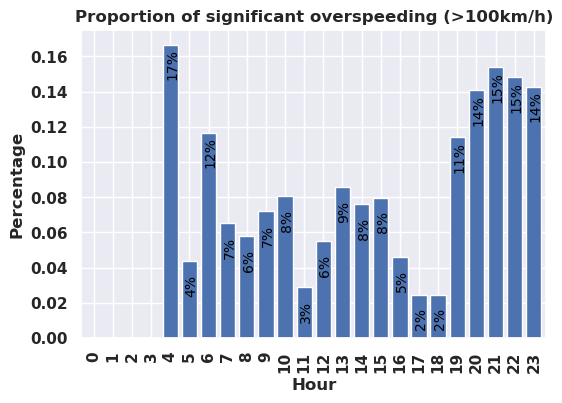

In [28]:
a = (
    previous_lines_df
    .assign(created_at=lambda df: df['created_at'].dt.tz_convert('Europe/Berlin'))
    .assign(Hour=lambda df: df['created_at'].dt.hour)
    .loc[lambda df: df['speed_kmh'].abs().between(100, 130)]
    .groupby('Hour')
    .size()
)

b = (
    previous_lines_df
    .assign(created_at=lambda df: df['created_at'].dt.tz_convert('Europe/Berlin'))
    .assign(Hour=lambda df: df['created_at'].dt.hour)
    # .loc[lambda df: df['speed_kmh'].abs().between(115, 120)]
    .groupby('Hour')
    .size()
)
prop = (a / b)
ax = prop.plot(kind='bar', figsize=(6, 4), width=0.8)
for i, v in enumerate(prop):
    ax.text(i+0.1, v-0.02, f'{v * 100:.0f}%', ha='center', va='bottom', fontsize=10, rotation=90, color='black')
# Add labels and legend
plt.xlabel('Hour', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.title('Proportion of significant overspeeding (>100km/h)', fontweight='bold')

# Make the tick labels along the x and y axes bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold');

# Weekly traffic

In [29]:
connection_string = utils.create_connection_string(
    endpoint=params['database']['endpoint'],
    database=params['database']['database'],
    db_username=os.getenv('POSTGRESQL_USERNAME'),
    db_password=os.getenv('POSTGRESQL_PASSWORD'),
    type=params['database']['type'],
    dbapi=params['database']['dbapi'],
    port=params['database']['port']
)

query = """
WITH ranked_rows AS (
  SELECT *,
         ROW_NUMBER() OVER (PARTITION BY line_id ORDER BY created_at DESC) AS rn
  FROM vehicles
  WHERE (created_at BETWEEN '2024-09-01 22:00:00' AND '2024-09-08 22:00:00')
  AND ABS(SPEED_KMH) BETWEEN 35 AND 125
)
SELECT *
FROM ranked_rows
WHERE rn = 1;
"""
previous_lines_df = utils.read_sql(query, connection_string)
v_type = np.random.choice(['Large', 'Small'], size=len(previous_lines_df), p=[0.21, 0.79])
previous_lines_df = (
    previous_lines_df
    .assign(Type=v_type)
)

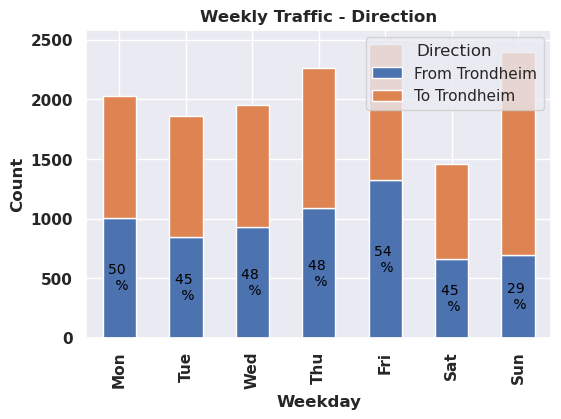

In [30]:
daily_direction = (
    previous_lines_df
    .assign(created_at=lambda df: df['created_at'].dt.tz_convert('Europe/Berlin'))
    .assign(Day=lambda df: df['created_at'].dt.strftime('%a'))
    .assign(Direction=lambda df: np.where(df['speed_kmh'] > 0, 'To Trondheim', 'From Trondheim'))
    .groupby(['Day', 'Direction'])
    .size()
    .unstack(level='Direction')
    .assign(Total=lambda df: df.sum(axis=1))
    .assign(FromTrondheimPercent=lambda df: df['From Trondheim'] / df['Total'] * 100)
    .loc[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]
)

# Plot the stacked bar chart
ax = daily_direction[['From Trondheim', 'To Trondheim']].plot(kind='bar', stacked=True, figsize=(6, 4))

# Annotate the percentage of "From Trondheim" near the bottom of each bar
for i in range(len(daily_direction)):
    from_trondheim_value = daily_direction['From Trondheim'].iloc[i]
    percent_from_trondheim = daily_direction['FromTrondheimPercent'].iloc[i]
    
    # Annotate percentage for "From Trondheim"
    ax.text(i, from_trondheim_value / 2, f'{percent_from_trondheim:.0f} \n %', 
            ha='center', va='center', color='black', fontsize=10)

# Add labels and title
plt.xlabel('Weekday', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Weekly Traffic - Direction', fontweight='bold')

# Make the tick labels along the x and y axes bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')


# # Show the plot
plt.show()

In [31]:
daily_speed = (
    previous_lines_df
    .assign(created_at=lambda df: df['created_at'].dt.tz_convert('Europe/Berlin'))
    .assign(Day=lambda df: df['created_at'].dt.strftime('%a'))
    .assign(Direction=lambda df: np.where(df['speed_kmh'] > 0, 'To Trondheim', 'From Trondheim'))
    .assign(speed_kmh=lambda df: np.abs(df['speed_kmh']))
    .groupby(['Day', 'Direction'])
    .agg({'speed_kmh': ['mean', 'std']})
    .fillna(0)
    .loc[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]
)

In [32]:
daily_speed

speed_kmh           
                         mean        std
Day Direction                           
Mon From Trondheim  82.250378  11.337523
    To Trondheim    86.040506  10.497585
Tue From Trondheim  83.480379  11.616935
    To Trondheim    86.937349  11.460284
Wed From Trondheim  83.136703  10.774262
    To Trondheim    87.185722  10.222717
Thu From Trondheim  83.068664  10.593426
    To Trondheim    86.492694  10.368409
Fri From Trondheim  83.051387   9.108690
    To Trondheim    86.081363   9.194271
Sat From Trondheim  83.788165  10.195258
    To Trondheim    85.962789   8.663229
Sun From Trondheim  84.144389   9.458551
    To Trondheim    83.952313   6.486030

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

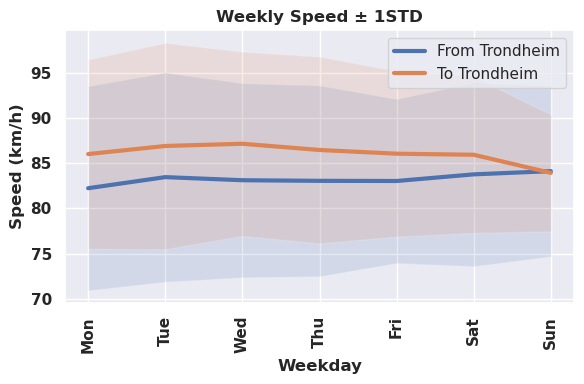

In [33]:
# Extract data for 'From Trondheim'
from_trondheim_mean = daily_speed.loc[:, ('speed_kmh', 'mean')].xs('From Trondheim', level='Direction')
from_trondheim_std = daily_speed.loc[:, ('speed_kmh', 'std')].xs('From Trondheim', level='Direction')

# Extract data for 'To Trondheim'
to_trondheim_mean = daily_speed.loc[:, ('speed_kmh', 'mean')].xs('To Trondheim', level='Direction')
to_trondheim_std = daily_speed.loc[:, ('speed_kmh', 'std')].xs('To Trondheim', level='Direction')

# Create the plot
plt.figure(figsize=(6, 4))

# Plot 'From Trondheim' with shaded area for std
plt.plot(from_trondheim_mean.index, from_trondheim_mean, label='From Trondheim', linewidth=3)  # Increased linewidth
plt.fill_between(from_trondheim_mean.index, 
                 from_trondheim_mean - from_trondheim_std, 
                 from_trondheim_mean + from_trondheim_std, 
                 alpha=0.15)

# Plot 'To Trondheim' with shaded area for std
plt.plot(to_trondheim_mean.index, to_trondheim_mean, label='To Trondheim', linewidth=3)  # Increased linewidth
plt.fill_between(to_trondheim_mean.index, 
                 to_trondheim_mean - to_trondheim_std, 
                 to_trondheim_mean + to_trondheim_std, 
                alpha=0.15)

# Add labels and legend
plt.xlabel('Weekday', fontweight='bold')
plt.ylabel('Speed (km/h)', fontweight='bold')
plt.title('Weekly Speed ± 1STD', fontweight='bold')

# Make the tick labels along the x and y axes bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Show all 24 hours on the x-axis
plt.xticks(rotation=90)  # Set xticks from 0 to 23 and rotate by 90 degrees

# Display legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Accummulate the number of vehicles

In [34]:
from dasly.utils import (
    assign_id_df,
    save_lines_csv,
    add_subtract_dt,
    get_date_time,
    gen_id,
    create_connection_string,
    read_sql,
    write_sql,
    table_exists,
    extract_elements,
    drop_table
)
from dasly.simpledas import simpleDASreader

In [35]:
def dasly_core(
    file_path: str,
    lowpass_filter_freq: float = 0.5,
    decimate_t_rate: int = 6,
    gaussian_smooth_s1: float = 80,
    gaussian_smooth_s2: float = 95,
    gaussian_smooth_std_s: float = 10,
    binary_threshold: float = 2.5e-8,
    hough_transform_speed_res: int = 0.5,
    hough_transform_length_meters: int = 500,
    dbscan_eps_seconds: int = 1
) -> pd.DataFrame:
    """Run the Dasly core algorithms.

    Args:
        file_path (str): The path to the HDF5 file that triggers the event.

    Returns:
        pd.DataFrame: The DataFrame containing the detected lines.
    """

    lines_df = pd.DataFrame()

    # Load the data
    ###########################################################################

    date, time = get_date_time(file_path)
    start = add_subtract_dt(
        f'{date} {time}',
        - (params['dasly']['batch'] + params['hdf5_file_length'])
    )
    file_paths_add, _, _ = simpleDASreader.find_DAS_files(
        experiment_path=params['input_dir'],
        start=start,
        duration=params['dasly']['batch'] + 2 * params['hdf5_file_length'],
        show_header_info=False
    )
    file_paths = extract_elements(
        lst=file_paths_add,
        num=int(params['dasly']['batch'] / params['hdf5_file_length']),
        last_value=file_path
    )

    # channel
    chIndex_all = np.arange(0, 800)
    chIndex_remove1 = np.arange(0, 36)
    chIndex_remove2 = np.arange(365, 387)
    chIndex_remove3 = np.arange(751, 800)
    chIndex_remove = np.concatenate((
        chIndex_remove1, chIndex_remove2, chIndex_remove3))
    chIndex = np.setdiff1d(chIndex_all, chIndex_remove)

    das = Dasly()
    das.load_data(
        file_paths=file_paths,
        integrate=params['integrate'],
        chIndex=chIndex,
        reset_channel_idx=True
    )

    # forward Gaussian smoothing
    ###########################################################################
    das.lowpass_filter(cutoff=lowpass_filter_freq)
    das.decimate(t_rate=decimate_t_rate)
    das.gaussian_smooth(
        s1=gaussian_smooth_s1,
        s2=gaussian_smooth_s2,
        std_s=gaussian_smooth_std_s)
    das.sobel_filter()
    das.binary_transform(threshold=binary_threshold)
    das.hough_transform(
        target_speed=(gaussian_smooth_s1 + gaussian_smooth_s2) / 2,
        speed_res=hough_transform_speed_res,
        length_meters=hough_transform_length_meters)
    if len(das.lines) > 0:
        lines_df = pd.concat([
            lines_df,
            das.lines_df.loc[lambda df: df['speed_kmh'] >= 0]
        ], axis=0, ignore_index=True)

    # backward Gaussian smoothing
    ###########################################################################
    das.reset()
    das.lowpass_filter(cutoff=lowpass_filter_freq)
    das.decimate(t_rate=decimate_t_rate)
    das.gaussian_smooth(
        s1=-gaussian_smooth_s2,
        s2=-gaussian_smooth_s1,
        std_s=gaussian_smooth_std_s)
    das.sobel_filter()
    das.binary_transform(threshold=binary_threshold)
    das.hough_transform(
        target_speed=(gaussian_smooth_s1 + gaussian_smooth_s2) / 2,
        speed_res=hough_transform_speed_res,
        length_meters=hough_transform_length_meters)
    if len(das.lines) > 0:
        lines_df = pd.concat([
            lines_df,
            das.lines_df.loc[lambda df: df['speed_kmh'] < 0]
        ], axis=0, ignore_index=True)

    return lines_df

In [36]:
start = '20231005 080700'

file_paths, _, _ = simpleDASreader.find_DAS_files(
    experiment_path=params['input_dir'],
    start=start,
    duration=3*60*60 - 1*60,  # 3 hours - 1 minute
    # duration=60,  # 3 hours - 1 minute
    show_header_info=False
)

In [37]:
# final_result = pd.DataFrame()
# for file_path in file_paths:
#     print(file_path)
#     lines_df = dasly_core(
#         file_path=file_path,
#         lowpass_filter_freq=params['lowpass_filter_freq'],
#         decimate_t_rate=params['decimate_t_rate'],
#         gaussian_smooth_s1=params['gaussian_smooth']['s1'],
#         gaussian_smooth_s2=params['gaussian_smooth']['s2'],
#         gaussian_smooth_std_s=params['gaussian_smooth']['std_s'],
#         binary_threshold=params['binary_threshold'],
#         hough_transform_speed_res=params['hough_transform']['speed_res'],
#         hough_transform_length_meters=params['hough_transform']['length_meters'],
#         dbscan_eps_seconds=params['dbscan_eps_seconds']
#     )
#     final_result = pd.concat([final_result, lines_df], axis=0, ignore_index=True)

In [38]:
# with open("../data/aastfjordbrua_processed/threehours.pkl", "wb") as file:
#     pickle.dump(final_result, file)

In [39]:
with open("../data/aastfjordbrua_processed/threehours.pkl", "rb") as file:
    final_result = pickle.load(file)

In [40]:
def metric(x: Union[np.array, list], y: Union[np.array, list]) -> float:
    distance = np.abs(np.array(x) - np.array(y)).sum()
    return distance

In [41]:
from sklearn.cluster import DBSCAN

In [42]:
reference = datetime.strptime('2023-10-05 08:00:00', '%Y-%m-%d %H:%M:%S')
lines = (
    final_result
    .assign(t1s=lambda df: (df['t1'] - reference).dt.total_seconds())
    .assign(t2s=lambda df: (df['t2'] - reference).dt.total_seconds())
    .loc[lambda df: df['speed_kmh'].abs().between(35, 125)]
)

cluster = DBSCAN(
    eps=1,
    min_samples=1,
    metric=metric
)

cluster = cluster.fit(lines[['t1s', 't2s']])
print(pd.Series(cluster.labels_).nunique())

336


In [43]:
lines_cluster = (
    lines
    .assign(cluster=list(map(str, cluster.labels_)))
    # .drop(['left_seconds', 'right_seconds', 'middle_seconds'], axis=1)
    # .loc[lambda df: df['speed'].abs().between(30, 110)]
    .astype({'cluster': 'int'})
    .groupby('cluster')
    .agg({
        't1': 'mean',
        't2': 'mean',
        'speed_kmh': ['mean', 'std', 'count'] ,
    })
    .sort_values(('t1', 'mean'), ascending=True)
    .assign
)
lines_cluster

<bound method DataFrame.assign of                                    t1                            t2  \
                                 mean                          mean   
cluster                                                               
0       2023-10-05 08:07:42.424999936 2023-10-05 08:08:11.209999872   
1       2023-10-05 08:07:44.031250176 2023-10-05 08:08:10.520833280   
2       2023-10-05 08:08:15.596153856 2023-10-05 08:08:47.048077056   
7       2023-10-05 08:13:25.875000064 2023-10-05 08:13:57.500000000   
3       2023-10-05 08:13:25.907258112 2023-10-05 08:13:59.556451584   
...                               ...                           ...   
333     2023-10-05 11:02:34.975000064 2023-10-05 11:03:10.124999936   
330     2023-10-05 11:02:36.481250048 2023-10-05 11:03:10.493750016   
331     2023-10-05 11:02:43.781250048 2023-10-05 11:03:14.750000128   
335     2023-10-05 11:03:58.000000000 2023-10-05 11:04:29.875000064   
334     2023-10-05 11:03:59.000000000 2023-

In [44]:
np.random.seed(42)
random_seconds = np.random.normal(loc=0, scale=10, size=len(log))
random_timedelta = pd.to_timedelta(random_seconds, unit='s')
log_predict = (
    log
    .assign(t1_extra=lambda df: df['t1']+ random_timedelta)
)
log_predict

,Type,Type2,Direction camera,t1,t2,s1,s2,t1_extra
0,Car,Small,coming close,2023-10-05 08:06:25.000,2023-10-05 08:06:55.000,0,692,2023-10-05 08:06:29.967141530
1,Truck,Large,going far,2023-10-05 08:07:39.000,2023-10-05 08:08:09.000,692,0,2023-10-05 08:07:37.617356988
2,Car,Small,coming close,2023-10-05 08:07:32.000,2023-10-05 08:08:02.000,0,692,2023-10-05 08:07:38.476885381
3,Car,Small,going far,2023-10-05 08:08:12.000,2023-10-05 08:08:42.000,692,0,2023-10-05 08:08:27.230298564
4,Car,Small,coming close,2023-10-05 08:12:54.000,2023-10-05 08:13:24.000,0,692,2023-10-05 08:12:51.658466253
...,...,...,...,...,...,...,...,...
337,Car,Small,going far,2023-10-05 11:03:56.070,2023-10-05 11:04:26.070,692,0,2023-10-05 11:03:52.856141583
338,Car,Small,coming close,2023-10-05 11:03:52.070,2023-10-05 11:04:22.070,0,692,2023-10-05 11:03:56.199314543
339,Car,Small,coming close,2023-10-05 11:04:23.260,2023-10-05 11:04:53.260,0,692,2023-10-05 11:04:17.622754472
340,Car,Small,coming close,2023-10-05 11:04:50.580,2023-10-05 11:05:20.580,0,692,2023-10-05 11:04:42.357796044


In [45]:
np.random.seed(42)

series = log_predict.sort_values('t1_extra').t1_extra

min_date = series.min()
max_date = series.max()

# Generate 10 random datetime64[ns] values between min_date and max_date with fixed seed
random_dates = pd.to_datetime(np.random.uniform(min_date.value, max_date.value, size=40), unit='ns')

np.random.seed(42)
# Generate a random list of 10 values, either 'a' or 'b'
random_list = np.random.choice(['coming close', 'going far'], size=40)
add_df = pd.DataFrame(
    {
        't1_extra': random_dates,
        'Direction camera': random_list
    }
)

combined_df = pd.concat([log_predict.loc[:, ['t1_extra', 'Direction camera']], add_df], axis=0)


# Step 3: Randomly remove 50 values from the combined series
# Shuffle the index and then remove 50 random values with fixed seed
combined_df = combined_df.sample(frac=1, random_state=42)#.reset_index(drop=True)  # Shuffle the series
predict_df = combined_df.drop(np.random.choice(combined_df.index, size=50, replace=False))
predict_df = predict_df.sort_values('t1_extra')
predict_df


,t1_extra,Direction camera
0,2023-10-05 08:06:29.967141530,coming close
1,2023-10-05 08:07:37.617356988,going far
2,2023-10-05 08:07:38.476885381,coming close
3,2023-10-05 08:08:27.230298564,going far
10,2023-10-05 08:10:10.930772480,coming close
...,...,...
337,2023-10-05 11:03:52.856141583,going far
338,2023-10-05 11:03:56.199314543,coming close
339,2023-10-05 11:04:17.622754472,coming close
340,2023-10-05 11:04:42.357796044,coming close


In [46]:
from matplotlib.dates import DateFormatter

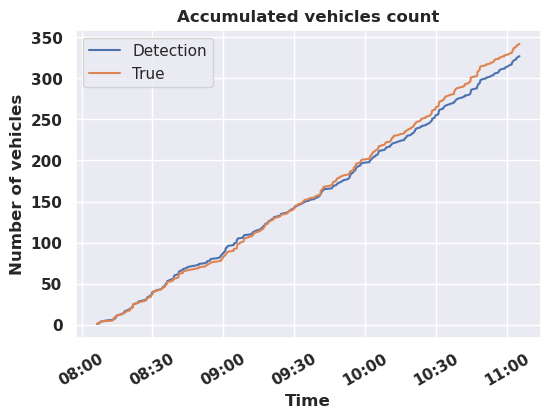

In [47]:
time_A = predict_df.t1_extra
time_B = log.sort_values('t1').t1

# Sort the time and create corresponding event count arrays
sorted_time_A, count_A = zip(*sorted(zip(time_A, range(1, len(time_A)+1))))
sorted_time_B, count_B = zip(*sorted(zip(time_B, range(1, len(time_B)+1))))

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(sorted_time_A, count_A, label='Detection')
plt.plot(sorted_time_B, count_B, label='True')
date_format = DateFormatter("%H:%M")  # Formatter for HH:MM
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Number of vehicles', fontweight='bold')
plt.title('Accumulated vehicles count', fontweight='bold')
plt.legend()
plt.xticks(rotation=30);

plt.xlabel('Time', fontweight='bold')

# Make the tick labels along the x and y axes bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold');


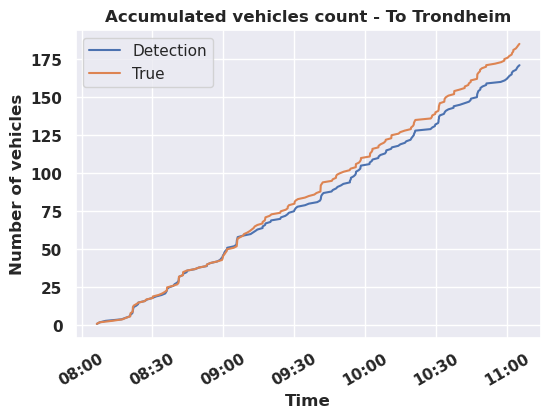

In [48]:
time_A = predict_df.loc[lambda df: df['Direction camera'] == 'coming close'].t1_extra
time_B = log.loc[lambda df: df['Direction camera'] == 'coming close'].sort_values('t1').t1

# Sort the time and create corresponding event count arrays
sorted_time_A, count_A = zip(*sorted(zip(time_A, range(1, len(time_A)+1))))
sorted_time_B, count_B = zip(*sorted(zip(time_B, range(1, len(time_B)+1))))

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(sorted_time_A, count_A, label='Detection')
plt.plot(sorted_time_B, count_B, label='True')

date_format = DateFormatter("%H:%M")  # Formatter for HH:MM
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Number of vehicles', fontweight='bold')
plt.title('Accumulated vehicles count - To Trondheim', fontweight='bold')
plt.legend()
plt.xticks(rotation=30);

plt.xlabel('Time', fontweight='bold')

# Make the tick labels along the x and y axes bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold');


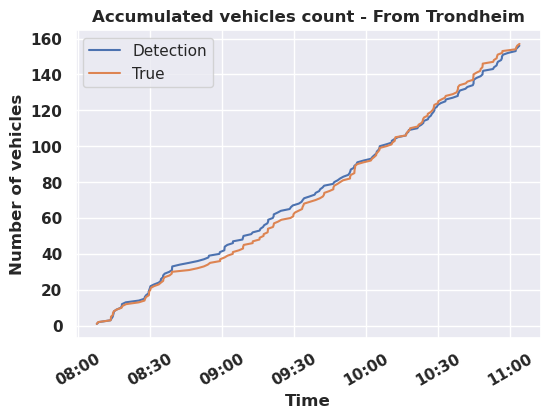

In [49]:
time_A = predict_df.loc[lambda df: df['Direction camera'] == 'going far'].t1_extra
time_B = log.loc[lambda df: df['Direction camera'] == 'going far'].sort_values('t1').t1

# Sort the time and create corresponding event count arrays
sorted_time_A, count_A = zip(*sorted(zip(time_A, range(1, len(time_A)+1))))
sorted_time_B, count_B = zip(*sorted(zip(time_B, range(1, len(time_B)+1))))

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(sorted_time_A, count_A, label='Detection')
plt.plot(sorted_time_B, count_B, label='True')

date_format = DateFormatter("%H:%M")  # Formatter for HH:MM
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Number of vehicles', fontweight='bold')
plt.title('Accumulated vehicles count - From Trondheim', fontweight='bold')
plt.legend()
plt.xticks(rotation=30);

plt.xlabel('Time', fontweight='bold')

# Make the tick labels along the x and y axes bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold');


In [128]:
log['Direction camera'].value_counts()

Direction camera
coming close    185
going far       157
Name: count, dtype: int64

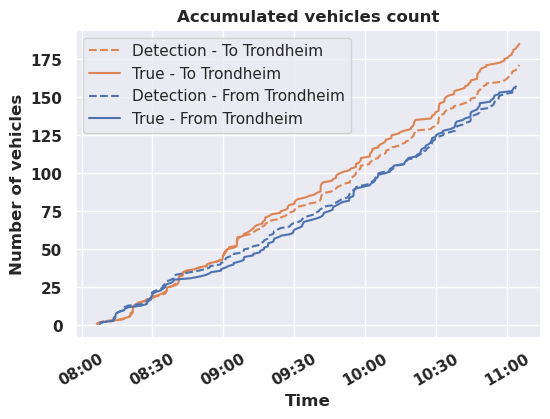

In [50]:
pre_close = predict_df.loc[lambda df: df['Direction camera'] == 'coming close'].t1_extra
true_close = log.loc[lambda df: df['Direction camera'] == 'coming close'].sort_values('t1').t1

pre_far = predict_df.loc[lambda df: df['Direction camera'] == 'going far'].t1_extra
true_far = log.loc[lambda df: df['Direction camera'] == 'going far'].sort_values('t1').t1

# Sort the time and create corresponding event count arrays
sorted_pre_close, count_pre_close = zip(*sorted(zip(pre_close, range(1, len(pre_close)+1))))
sorted_true_close, count_true_close = zip(*sorted(zip(true_close, range(1, len(true_close)+1))))
sorted_pre_far, count_pre_far = zip(*sorted(zip(pre_far, range(1, len(pre_far)+1))))
sorted_true_far, count_true_far = zip(*sorted(zip(true_far, range(1, len(true_far)+1))))

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(sorted_pre_close, count_pre_close, label='Detection - To Trondheim', color='C1', linestyle='--')
plt.plot(sorted_true_close, count_true_close, label='True - To Trondheim', color='C1')
plt.plot(sorted_pre_far, count_pre_far, label='Detection - From Trondheim', color='C0', linestyle='--')
plt.plot(sorted_true_far, count_true_far, label='True - From Trondheim' , color='C0')

date_format = DateFormatter("%H:%M")  # Formatter for HH:MM
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Number of vehicles', fontweight='bold')
plt.title('Accumulated vehicles count', fontweight='bold')
plt.legend()
plt.xticks(rotation=30);

plt.xlabel('Time', fontweight='bold')

# Make the tick labels along the x and y axes bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold');


In [51]:
log.groupby('Direction camera').Type2.value_counts(normalize=True)

Direction camera  Type2
coming close      Small    0.800000
                  Large    0.200000
going far         Small    0.783439
                  Large    0.216561
Name: proportion, dtype: float64

In [52]:
log

,Type,Type2,Direction camera,t1,t2,s1,s2
0,Car,Small,coming close,2023-10-05 08:06:25.000,2023-10-05 08:06:55.000,0,692
1,Truck,Large,going far,2023-10-05 08:07:39.000,2023-10-05 08:08:09.000,692,0
2,Car,Small,coming close,2023-10-05 08:07:32.000,2023-10-05 08:08:02.000,0,692
3,Car,Small,going far,2023-10-05 08:08:12.000,2023-10-05 08:08:42.000,692,0
4,Car,Small,coming close,2023-10-05 08:12:54.000,2023-10-05 08:13:24.000,0,692
...,...,...,...,...,...,...,...
337,Car,Small,going far,2023-10-05 11:03:56.070,2023-10-05 11:04:26.070,692,0
338,Car,Small,coming close,2023-10-05 11:03:52.070,2023-10-05 11:04:22.070,0,692
339,Car,Small,coming close,2023-10-05 11:04:23.260,2023-10-05 11:04:53.260,0,692
340,Car,Small,coming close,2023-10-05 11:04:50.580,2023-10-05 11:05:20.580,0,692


In [53]:
# connection_string = utils.create_connection_string(
#     endpoint=params['database_cgf']['endpoint'],
#     database=params['database_cgf']['database'],
#     db_username=os.getenv('POSTGRESQL_USERNAME'),
#     db_password=os.getenv('POSTGRESQL_PASSWORD'),
#     type=params['database_cgf']['type'],
#     dbapi=params['database_cgf']['dbapi'],
#     port=params['database_cgf']['port']
# )

# query = """
# WITH ranked_rows AS (
#   SELECT *,
#          ROW_NUMBER() OVER (PARTITION BY line_id ORDER BY created_at DESC) AS rn
#   FROM vehicles_train
#   WHERE ABS(SPEED_KMH) BETWEEN 35 AND 125
# )
# SELECT *
# FROM ranked_rows
# WHERE rn = 1;
# """
# previous_lines_df = utils.read_sql(query, connection_string)
# v_type = np.random.choice(['Large', 'Small'], size=len(previous_lines_df), p=[0.21, 0.79])
# previous_lines_df = (
#     previous_lines_df
#     .assign(Type=v_type)
# )

In [54]:
# time_A = previous_lines_df.t1.sort_values()
# time_B = log.t1.sort_values()

# Optimzation

In [55]:
connection_string = utils.create_connection_string(
    endpoint=params['database_cgf']['endpoint'],
    database=params['database_cgf']['database'],
    db_username=os.getenv('POSTGRESQL_USERNAME'),
    db_password=os.getenv('POSTGRESQL_PASSWORD'),
    type=params['database_cgf']['type'],
    dbapi=params['database_cgf']['dbapi'],
    port=params['database_cgf']['port']
)

In [124]:
import optuna
import matplotlib.pyplot as plt

# Load the study from the PostgreSQL database
study = optuna.load_study(
    study_name='my_study15', 
    storage=connection_string
)



# # Plot slice plot (parameter values vs. objective values)
# # optuna.visualization.plot_slice(study, params=['binary_threshold'])
# # Generate the Plotly slice plot for only one parameter
# fig = optuna.visualization.plot_slice(study, params=['binary_threshold'])

# # Update the figure layout to control the size
# fig.update_layout(
#     width=600,  # Set the width of the plot
#     height=400  # Set the height of the plot
# )

# # Show the plot
# fig.show()

In [123]:
# fig = optuna.visualization.plot_slice(study, params=['lowpass_filter_freq'])

# # Update the figure layout to control the size
# fig.update_layout(
#     width=600,  # Set the width of the plot
#     height=400  # Set the height of the plot
# )

# # Show the plot
# # fig.show()

In [126]:
optuna.visualization.plot_slice(study)

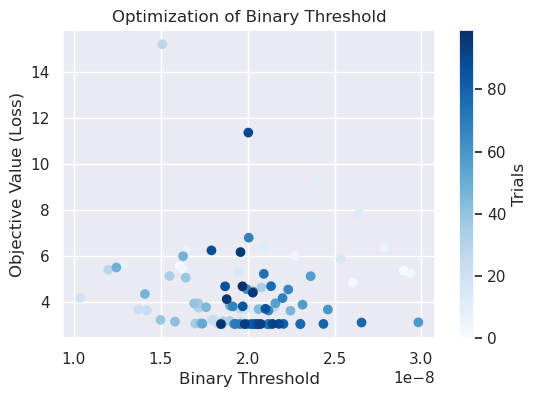

In [76]:
# Get all completed trials as a DataFrame
df = study.trials_dataframe()

# Example: plot the binar between one hyperparameter and the loss (objective value)
param_name = 'params_binary_threshold'  # Replace with your parameter name
df_filtered = df[df['state'] == 'COMPLETE']  # Filter completed trials


plt.figure(figsize=(6, 4))
scatter = plt.scatter(df_filtered[param_name], df_filtered['value'],  c=df_filtered.index, cmap='Blues')
plt.xlabel('Binary Threshold')
plt.ylabel('Objective Value (Loss)')
plt.title(f'Optimization of Binary Threshold')
plt.grid(True)
# Add a colorbar
colorbar = plt.colorbar(scatter)

# Set the colorbar label (title)
colorbar.set_label('Trials', fontsize=12)
plt.show()

In [119]:
def transform1(x):
    if x == 0.5:
        x = 0
    elif x == 0.2:
        x = 0.05
    return x

In [120]:
def transform2(x):
    if x == 0:
        x = 0
    elif x == 0.05:
        x = 1
    elif x == 0.1:
        x = 2
    elif x == 1:
        x = 3
    elif x == 2:
        x = 4
    elif x == 5:
        x = 5
    elif x == 10:
        x = 6
    elif x == 20:
        x = 7
    return x

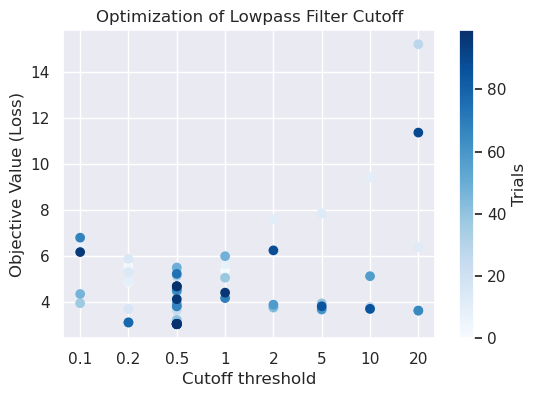

In [121]:
# Get all completed trials as a DataFrame
df = study.trials_dataframe()

# Example: plot the binar between one hyperparameter and the loss (objective value)
param_name = 'params_lowpass_filter_freq'  # Replace with your parameter name
df_filtered = df[df['state'] == 'COMPLETE']  # Filter completed trials


plt.figure(figsize=(6, 4))
scatter = plt.scatter(
    df_filtered[param_name].apply(transform1).apply(transform2),
    df_filtered['value'],
    c=df_filtered.index, cmap='Blues'
)
plt.xlabel('Cutoff threshold')
plt.ylabel('Objective Value (Loss)')
plt.title(f'Optimization of Lowpass Filter Cutoff')
plt.grid(True)
# Add a colorbar
colorbar = plt.colorbar(scatter)

# Set custom xticks and labels
custom_ticks = [0, 1, 2, 3, 4, 5, 6, 7]  # Custom tick positions
custom_labels = ['0.1', '0.2', '0.5', '1', '2', '5', '10', '20']  # Custom tick labels
plt.xticks(custom_ticks, custom_labels)

# Set the colorbar label (title)
colorbar.set_label('Trials', fontsize=12)
plt.show()

In [104]:
df_filtered

,number,value,datetime_start,datetime_complete,duration,params_binary_threshold,params_decimate_t_rate,params_lowpass_filter_freq,state
0,0,5.541098,2024-09-03 23:07:28.295693,2024-09-04 00:35:13.905471,0 days 01:27:45.609778,1.608484e-08,5,0.2,COMPLETE
1,1,5.353353,2024-09-04 00:35:13.949273,2024-09-04 02:22:50.187873,0 days 01:47:36.238600,2.897771e-08,1,1.0,COMPLETE
2,2,5.229451,2024-09-04 02:22:50.211666,2024-09-04 03:44:13.893627,0 days 01:21:23.681961,2.939169e-08,2,0.1,COMPLETE
3,3,4.835231,2024-09-04 03:44:13.924925,2024-09-04 05:08:31.055372,0 days 01:24:17.130447,2.604394e-08,5,0.2,COMPLETE
4,4,5.428006,2024-09-04 05:08:31.079484,2024-09-04 06:32:46.473448,0 days 01:24:15.393964,1.621965e-08,8,0.2,COMPLETE
...,...,...,...,...,...,...,...,...,...
95,95,6.160983,2024-09-09 17:18:34.833698,2024-09-09 18:52:01.175361,0 days 01:33:26.341663,1.958439e-08,2,0.5,COMPLETE
96,96,4.113150,2024-09-09 18:52:01.211838,2024-09-09 20:12:38.523203,0 days 01:20:37.311365,1.878955e-08,8,0.1,COMPLETE
97,97,4.396879,2024-09-09 20:12:38.547754,2024-09-09 21:39:22.960182,0 days 01:26:44.412428,2.029088e-08,20,1.0,COMPLETE
98,98,3.031358,2024-09-09 21:39:22.990571,2024-09-09 22:59:38.566028,0 days 01:20:15.575457,1.845382e-08,20,0.1,COMPLETE
